In [3]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt

Numpy is a python package which is used for scientific computing. It provides support for large multi-dimensional arrays and matrices. Pandas is python library used for data manipulation and analysis

In [4]:
og_data = pd.read_csv("fraud_dataset.csv",sep=',')
og_data.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Read a comma-separated values (csv) file into DataFrame
Get first 20 rows

In [5]:
og_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


To view basic statistical details

In [6]:
og_data.isnull().values.any()

False

Find any missing data in the dataframe

In [7]:
og_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Find any missing data in the dataframe

In [8]:
og_data.groupby("isFraud")[["nameOrig","nameDest"]].describe()

nameOrig                            nameDest                        \
           count   unique          top freq    count   unique          top   
isFraud                                                                      
0        6354407  6345122  C1784010646    3  6354407  2719685  C1286084959   
1           8213     8213  C1849235881    1     8213     8169   C668046170   

              
        freq  
isFraud       
0        113  
1          2

To check the count of client names and destination names repetition

In [9]:
og_data.groupby(['type','isFraud']).step.count().unstack()

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


Find the count of fraud cases in the type of transaction

In [10]:
pd.crosstab(og_data.isFraud,og_data.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


Find the relation between isFraud and isFlaggedFraud

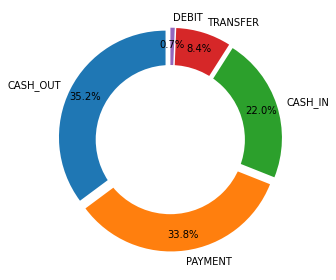

In [11]:
explode = (0.05,0.05,0.05,0.05,0.05)
plt.pie(og_data.type.value_counts(), labels=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout()
plt.show()

Pie chart for the number of transactions in each transactions type

Text(0, 0.5, 'Number of transactions')

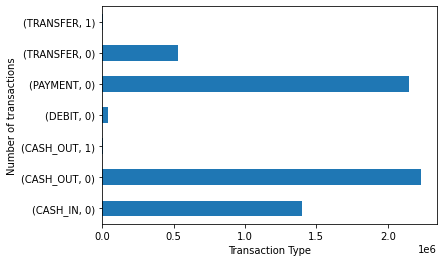

In [12]:
axes = og_data.groupby(['type', 'isFraud']).size().plot(kind='barh')
axes.set_xlabel("Transaction Type")
axes.set_ylabel("Number of transactions")

To show isFraud in every type of transaction

In [13]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import graphviz

to_be_dropped=['isFlaggedFraud', 'nameDest', 'nameOrig', 'step', 'type']

og_dummy = pd.get_dummies(og_data.loc[og_data.type.apply(lambda x: x in ['CASH_OUT','TRANSFER'])].drop(labels=to_be_dropped,axis=1))

X_train, X_test, y_train, y_test = train_test_split(
    og_dummy.drop('isFraud',axis=1), 
    og_dummy.isFraud, 
    test_size = 0.25, 
    random_state=2019, 
    shuffle=False
)

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval  = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Specify configurations as dictionary
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 60,
    'learning_rate': 0.01,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.5,
    'bagging_freq': 25,
    'verbose': 1
}

gbm = lgb.train(params,
            lgb_train,
            num_boost_round=30,
            early_stopping_rounds=25,
            valid_sets=[lgb_train,lgb_eval],
            valid_names=['train', 'eval'])

[LightGBM] [Info] Number of positive: 3733, number of negative: 2074073
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2077806, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001797 -> initscore=-6.320057
[LightGBM] [Info] Start training from score -6.320057
[1]	train's binary_logloss: 0.00817044	eval's binary_logloss: 0.024259
Training until validation scores don't improve for 25 rounds
[2]	train's binary_logloss: 0.00797819	eval's binary_logloss: 0.0236369
[3]	train's binary_logloss: 0.0079377	eval's binary_logloss: 0.0235236
[4]	train's binary_logloss: 0.00778368	eval's binary_logloss: 0.0230107
[5]	train's binary_logloss: 0.00769261	eval's binary_logloss: 0.0227195
[6]	train's binary

Light GBM is a fast, distributed, high-performance gradient boosting framework based on a decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms.

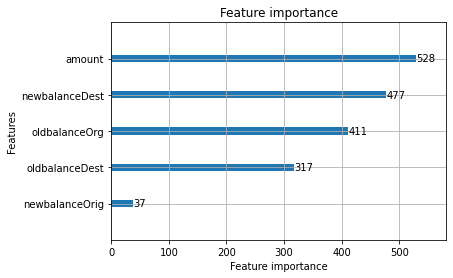

In [14]:
axis = lgb.plot_importance(gbm, max_num_features=10)

Plots of feature importance graph with respect to all the types of transactions.

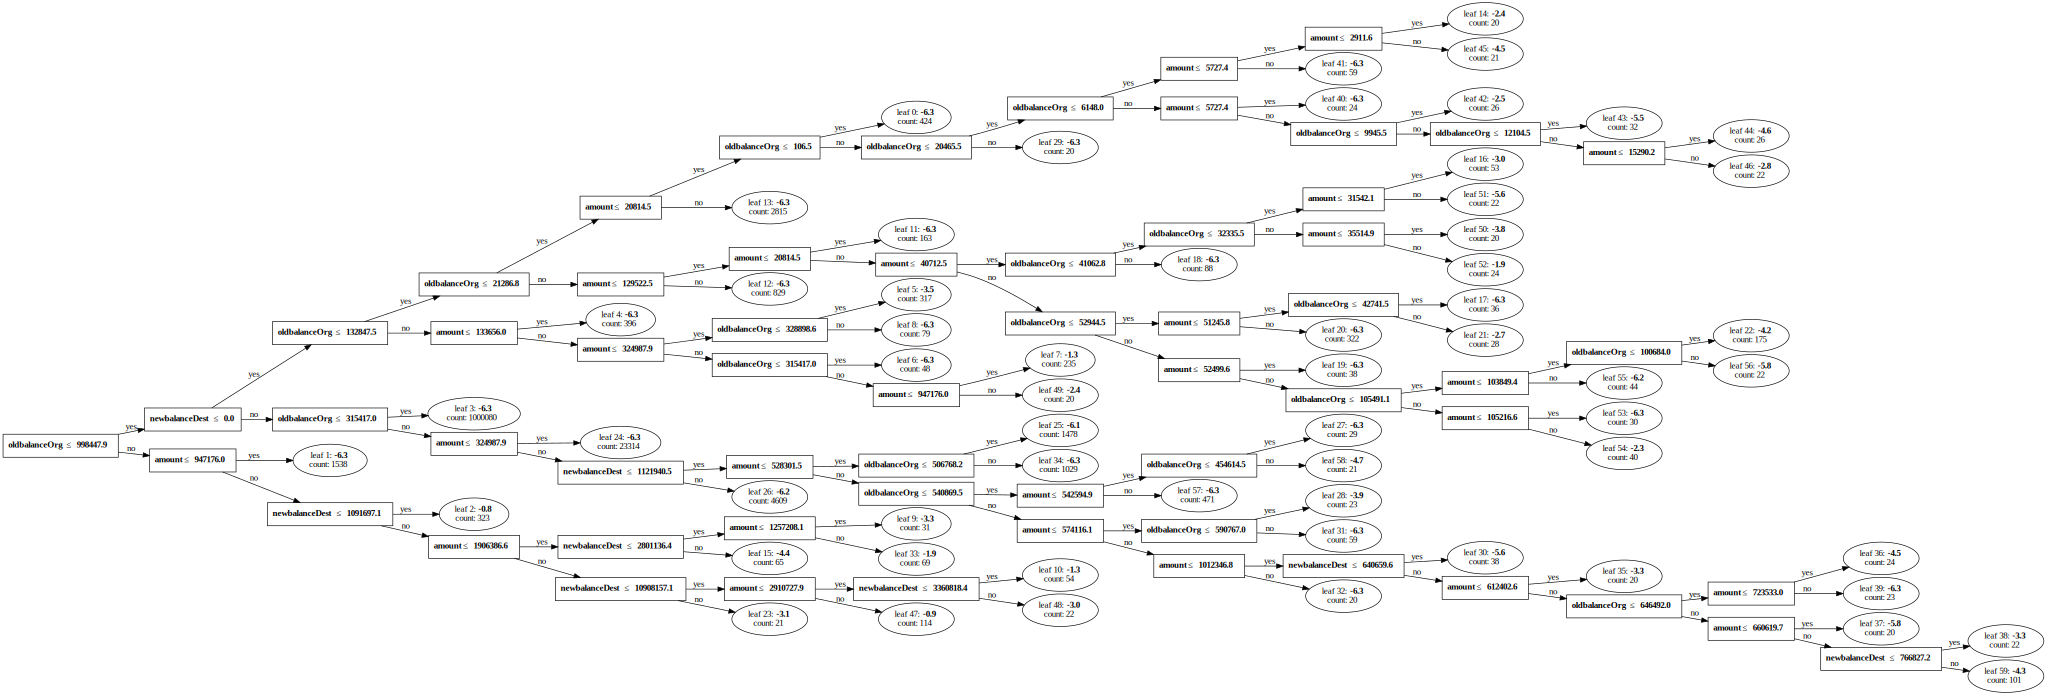

In [15]:
lgb.create_tree_digraph(gbm,tree_index=0,precision=1,show_info=['leaf_count'])

Create a digraph representation of the decision tree based on the old origin balance and new balance at origin and destination.

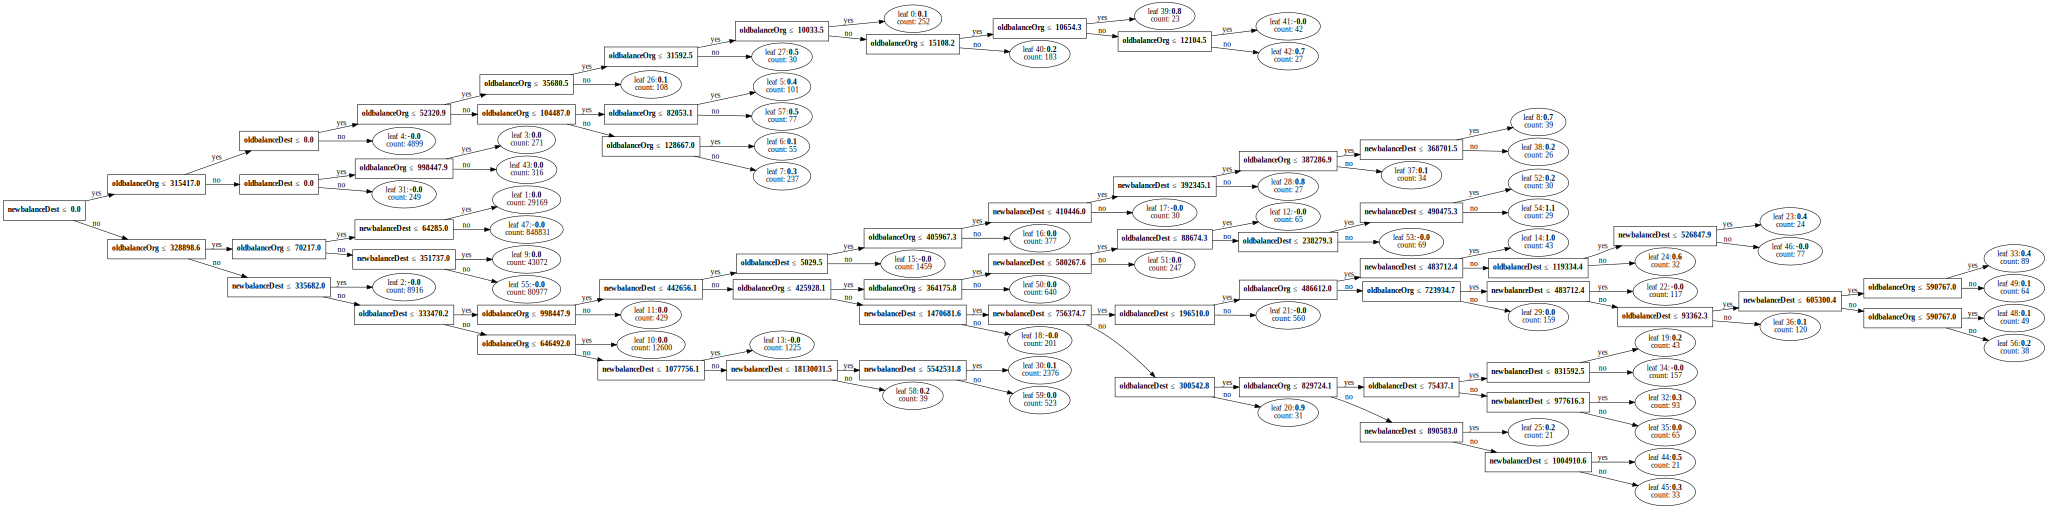

In [16]:
lgb.create_tree_digraph(gbm,tree_index=1,precision=1,show_info=['leaf_count'])

Create a digraph representation of the decision tree based on the old origin balance, new origin balance, and transaction amount.

In [17]:
y_test_pred = gbm.predict(X_test)
print('Validation AUC Score: {:.3%}'.format(roc_auc_score(y_test,y_test_pred)))

Validation AUC Score: 99.024%


Predicting the value of isFraud for the testing sample and checking the predicted value with the existing values.

In [18]:
print('Validation F1 Score: {:.3%}'.format(f1_score(y_test,y_test_pred>0.5)))

Validation F1 Score: 4.580%


The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

`F1 = 2 * (precision * recall) / (precision + recall)`

In [19]:
pd.crosstab(pd.cut(y_test_pred,np.arange(0,1.01,0.1)),y_test)

isFraud,0,1
row_0,,
"(0.0, 0.1]",688100,1627
"(0.1, 0.2]",15,336
"(0.2, 0.3]",5,678
"(0.3, 0.4]",1,225
"(0.4, 0.5]",2,1509
"(0.5, 0.6]",0,105


For reference, a cross-tabulation is a two dimensional table that records the number of respondents that have the specific characteristics described in the cells of the table. Cross-tabulation tables provide a wealth of information about the relationship between the variables.